In [4]:
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor

from header.model import feature_generation, predict, get_csv_from_json
from header.model.evaluate import regression_report

## Training

In [2]:
# combine all json file as one csv file
# df = get_csv_from_json(save_dir = './data')

In [3]:
# read data
col_name = ['TSMC', 'ASML', 'AM', 'SUMCO']
cols = len(col_name)
origin = pd.read_csv('./data/VolumneForFourCompany.csv')

# produce data
# datelist = pd.date_range(start='2020-01-01',end='2022-05-28')
# size = len(datelist)
# df = pd.DataFrame()
# df['date'] = datelist
# x = np.linspace(0, 100, size)
# df['tsmc'] = np.sin(x)
# df['asml'] = np.cos(x) + 6
# df['amat'] = np.sin(x) + 12
# df['sumco'] = np.cos(x) + 18

# features generation
df = feature_generation(origin, cols = col_name)

shift = 0
# Y = X[['date'] + col_name].shift(shift)
# X, Y = X.reset_index(drop = True).iloc[: X.shape[0] - (shift + 1)], Y.iloc[1:].reset_index(drop = True)

# train test split
train = df[df['date'] < '2022-01-01']
test = df[df['date'] >= '2022-01-01']

y_train = train[['date'] + col_name].shift(shift)
x_train, y_train = train.reset_index(drop = True).iloc[: train.shape[0] - (shift + 1)], y_train.iloc[1:].reset_index(drop = True)

y_test = test[['date'] + col_name].shift(shift)
x_test, y_test = test.reset_index(drop = True).iloc[: test.shape[0] - (shift + 1)], y_test.iloc[1:].reset_index(drop = True)

# x = X.drop(columns = ['date']).to_numpy()
# y = Y.drop(columns = ['date']).to_numpy()

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(300, 85) (300, 5) (119, 85) (119, 5)


## Rolling prediction

In [11]:
model_lst = []
x, y = x_train.drop(columns = ['date']).to_numpy(), y_train.drop(columns = ['date']).to_numpy()

# train
model = MultiOutputRegressor(
    BayesianRidge()
)

model.fit(x, y)
dump(model, './ckpt/BayesianRidge.pkl') 

# test
x, y = x_test.drop(columns = ['date']).to_numpy(), y_test.drop(columns = ['date']).to_numpy()
pred = model.predict(x)


# plt.figure(figsize = (10, 6), dpi = 70)
# plt.title('Ground truth')
# for i in range(cols):
#     plt.plot(y[:, i])
# plt.show()

# plt.figure(figsize = (10, 6), dpi = 70)
# plt.title('Predicted by model')
# for i in range(cols):
#     plt.plot(pred[:, i])
# plt.show()


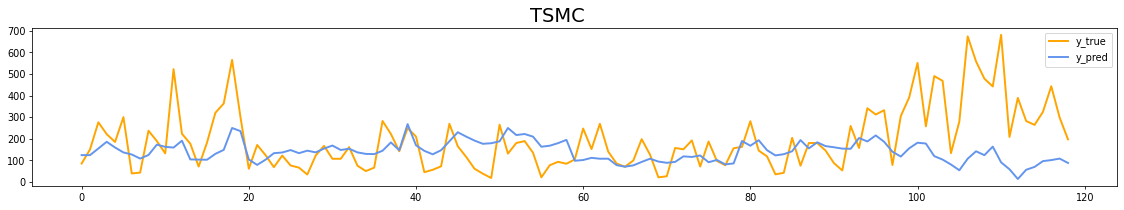

mae: 111.1507, rmse: 158.0024, mape: 0.8089, r2: -0.2377




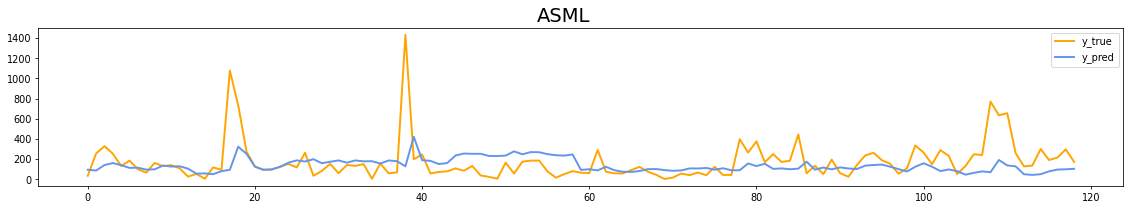

mae: 123.6416, rmse: 211.8087, mape: 2.2656, r2: -0.1441




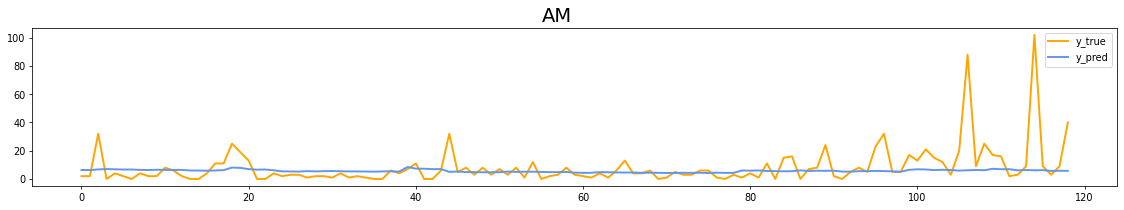

mae: 6.6700, rmse: 13.8935, mape: 3571729540893741.0000, r2: -0.0145




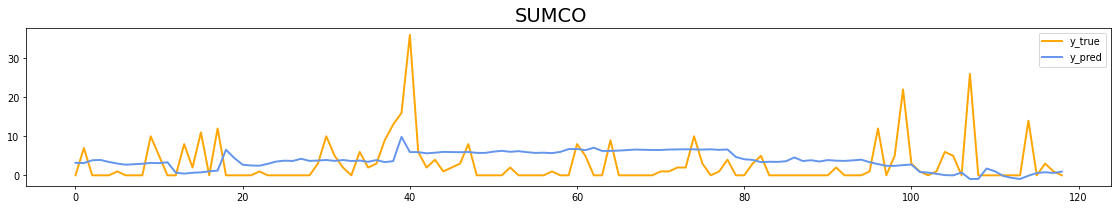

mae: 4.3527, rmse: 6.0776, mape: 9224464133988876.0000, r2: -0.2288




In [12]:
report = regression_report(y, pred, col_lst = col_name)

## Rolling Prediction

In [4]:
data = test.iloc[len(test) - 61: ].reset_index(drop = True)
model = load('./ckpt/BayesianRidge.pkl')
pred = predict(
    model,
    feature_generation,
    data,
    col_lst = col_name,
    start = '2022-05-01',
    end = '2022-12-31'
)

2022-05-01
2022-05-02
2022-05-03
2022-05-04
2022-05-05
2022-05-06
2022-05-07
2022-05-08
2022-05-09
2022-05-10
2022-05-11
2022-05-12
2022-05-13
2022-05-14
2022-05-15
2022-05-16
2022-05-17
2022-05-18
2022-05-19
2022-05-20
2022-05-21
2022-05-22
2022-05-23
2022-05-24
2022-05-25
2022-05-26
2022-05-27
2022-05-28
2022-05-29
2022-05-30
2022-05-31
2022-06-01
2022-06-02
2022-06-03
2022-06-04
2022-06-05
2022-06-06
2022-06-07
2022-06-08
2022-06-09
2022-06-10
2022-06-11
2022-06-12
2022-06-13
2022-06-14
2022-06-15
2022-06-16
2022-06-17
2022-06-18
2022-06-19
2022-06-20
2022-06-21
2022-06-22
2022-06-23
2022-06-24
2022-06-25
2022-06-26
2022-06-27
2022-06-28
2022-06-29
2022-06-30
2022-07-01
2022-07-02
2022-07-03
2022-07-04
2022-07-05
2022-07-06
2022-07-07
2022-07-08
2022-07-09
2022-07-10
2022-07-11
2022-07-12
2022-07-13
2022-07-14
2022-07-15
2022-07-16
2022-07-17
2022-07-18
2022-07-19
2022-07-20
2022-07-21
2022-07-22
2022-07-23
2022-07-24
2022-07-25
2022-07-26
2022-07-27
2022-07-28
2022-07-29
2022-07-30

## Plot

In [ ]:
plt.figure(figsize = (10, 6), dpi = 70)
for col in col_name:
    plt.plot(pred['date'], pred[col])
plt.show()

In [11]:
pred['date'] = pred['date'].astype(dtype = str)
total_origin = pd.concat([origin, pred], axis = 0).reset_index(drop = True)
total_origin

,date,TSMC,ASML,AM,SUMCO
0,2021-01-01,3,1,0,0
1,2021-01-02,23,10,0,0
2,2021-01-03,54,17,0,1
3,2021-01-04,76,34,1,0
4,2021-01-05,72,98,6,1
...,...,...,...,...,...
721,2022-12-27,133,123,7,4
722,2022-12-28,133,123,7,4
723,2022-12-29,133,123,7,4
724,2022-12-30,132,123,7,4


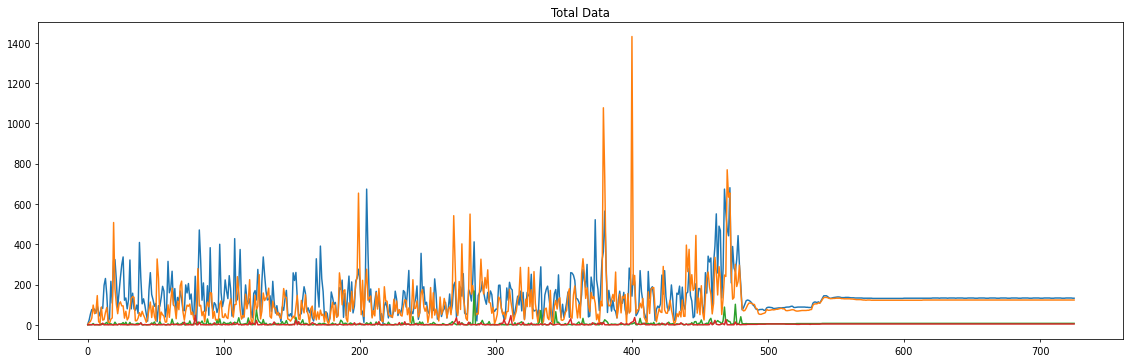

In [16]:
plt.figure(figsize = (20, 6), dpi = 70)
plt.title('Total Data')
for col in total_origin.columns[1: ]:
    plt.plot(total_origin[col], label = col)
plt.show()

In [12]:
total_origin.to_csv('./data/total.csv', index = False)

## Test run.py

In [1]:
import numpy as np
import pandas as pd
from joblib import load

from datetime import datetime, timedelta
from sklearn.linear_model import BayesianRidge
from sklearn.multioutput import MultiOutputRegressor

from header.model import feature_generation, predict
from header.crawler import get_today

In [2]:
# -------- prepare data --------
tmp = get_today()
# tmp = {
#     'date': '2022-05-01',
#     'TSMC': 19,
#     'ASML': 87,
#     'AM': 12,
#     'SUMCO': 2
# }

today = pd.DataFrame()
for key in tmp.keys():
    today[key] = [tmp[key]]
    
total = pd.read_csv('./data/GroundTruth.csv')
total = pd.concat([total, today], axis = 0).reset_index(drop = True)
df = total[total.shape[0] - 61: ]

date_format = "%Y-%m-%d"
start_date = (datetime.strptime(tmp['date'], date_format) + timedelta(days = 1)).strftime(date_format)

col_name = ['TSMC', 'ASML', 'AM', 'SUMCO']

# -------- predict --------
# load model
model = load('./ckpt/BayesianRidge.pkl')
pred = predict(
    model,
    feature_generation,
    df,
    col_lst = col_name,
    start = start_date,
    end = '2022-12-31',
    verbose = False
)

# -------- save csv --------
#pred.to_csv('./data/Pred.csv', index = False)
#total.to_csv('./data/GroundTruth.csv', index = False)

URL : https://www.google.com/search?q="Applied+Material"+OR+ASML+OR+SUMCO+TSMC+-filetype:pdf&tbs=qdr:d&filter=0
[Check][URL] URL : https://www.google.com/search?q=%22Applied+Material%22+OR+ASML+OR+SUMCO+TSMC+-filetype:pdf&tbs=qdr:d&ei=RX-cYub7DIHVhwOCgr_wBg&start=10&sa=N&filter=0&ved=2ahUKEwimsvenh5b4AhWB6mEKHQLBD24Q8tMDegQIARA-&filter=0
[Check][URL] URL : https://www.google.com/search?q=%22Applied+Material%22+OR+ASML+OR+SUMCO+TSMC+-filetype:pdf&tbs=qdr:d&ei=RX-cYub7DIHVhwOCgr_wBg&start=20&sa=N&filter=0&ved=2ahUKEwimsvenh5b4AhWB6mEKHQLBD24Q8tMDegQIARBA&filter=0
[Check][URL] URL : https://www.google.com/search?q=%22Applied+Material%22+OR+ASML+OR+SUMCO+TSMC+-filetype:pdf&tbs=qdr:d&ei=RX-cYub7DIHVhwOCgr_wBg&start=30&sa=N&filter=0&ved=2ahUKEwimsvenh5b4AhWB6mEKHQLBD24Q8tMDegQIARBC&filter=0
[Check][URL] URL : https://www.google.com/search?q=%22Applied+Material%22+OR+ASML+OR+SUMCO+TSMC+-filetype:pdf&tbs=qdr:d&ei=RX-cYub7DIHVhwOCgr_wBg&start=40&sa=N&filter=0&ved=2ahUKEwimsvenh5b4AhWB6mEKHQLBD2

KeyboardInterrupt: 

In [5]:
# ground = pd.read_csv('./data/GroundTruth.csv')
# pred = pd.read_csv('./data/Pred.csv')

pred

,date,TSMC,ASML,AM,SUMCO
0,2022-05-02,89,71,5,1
1,2022-05-03,116,77,5,1
2,2022-05-04,134,89,6,1
3,2022-05-05,137,105,5,2
4,2022-05-06,136,114,5,2
...,...,...,...,...,...
239,2022-12-27,133,123,7,4
240,2022-12-28,133,123,7,4
241,2022-12-29,133,123,7,4
242,2022-12-30,133,123,7,4


In [6]:
total

,date,TSMC,ASML,AM,SUMCO
0,2021-01-01,3,1,0,0
1,2021-01-02,23,10,0,0
2,2021-01-03,54,17,0,1
3,2021-01-04,76,34,1,0
4,2021-01-05,72,98,6,1
...,...,...,...,...,...
477,2022-04-27,324,190,9,0
478,2022-04-28,443,214,3,3
479,2022-04-29,298,296,9,1
480,2022-04-30,197,172,40,0


In [6]:
pred

,date,TSMC,ASML,AM,SUMCO
0,2022-05-02,89,71,5,1
1,2022-05-03,116,77,5,1
2,2022-05-04,134,89,6,1
3,2022-05-05,137,105,5,2
4,2022-05-06,136,114,5,2
...,...,...,...,...,...
239,2022-12-27,133,123,7,4
240,2022-12-28,133,123,7,4
241,2022-12-29,133,123,7,4
242,2022-12-30,133,123,7,4
